In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [47]:
### for accessing file from google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/MLlab/regression-mtech/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/MLlab/regression-mtech


In [48]:
####### Simple Linear regression with one input and one output########
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

mba_salary_df = pd.read_csv( 'MBA Salary.csv' )
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [49]:
mba_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB


In [50]:
X = mba_salary_df['Percentage in Grade 10']
Y = mba_salary_df['Salary']
model = LinearRegression()
X=np.array(X).reshape(-1, 1)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model.fit(X_train, Y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 44950.163305414586
Mean Squared Error (MSE): 3480554701.902649
Root Mean Squared Error (RMSE): 58996.226166617205
R-squared (R²): 0.3805122592921436


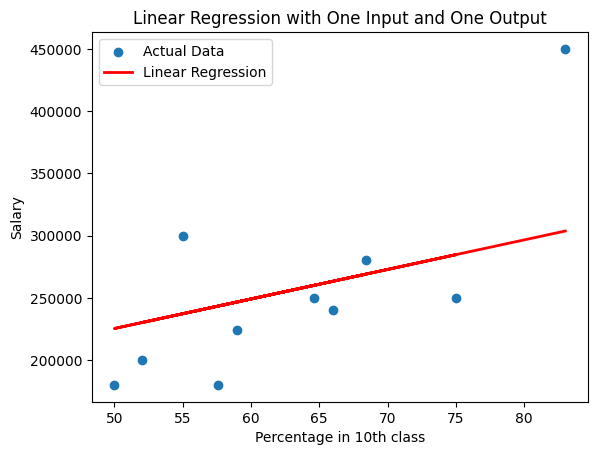

In [52]:
X_new = np.array([6]).reshape(-1, 1)
y_pred = model.predict(X_new)

# Plot the data and the regression line
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Percentage in 10th class')
plt.ylabel('Salary')
plt.title('Linear Regression with One Input and One Output')
plt.legend()
plt.show()

In [53]:
####Incorporating Lasso Regression


from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.3)
lassoReg.fit(X_train,Y_train)
y_pred= lassoReg.predict(X_test)
# calculating mse
mse = np.mean((y_pred - y_test)**2)
print(mse)
rsq=lassoReg.score(X_test,y_test)
print("R-squared:", rsq)

3480556831.731561
R-squared: 0.3805118802138029


In [54]:
####Incorporating Ellasticnet Regression

from sklearn.linear_model import ElasticNet
ENreg = ElasticNet(alpha=1, l1_ratio=0.5)
ENreg.fit(X_train,Y_train)
pred_cv = ENreg.predict(X_test)
#calculating mse
mse = np.mean((pred_cv - y_test)**2)
print(mse)
rsq=ENreg.score(X_test,y_test)
print("R-squared:", rsq)

3488957236.5249085
R-squared: 0.37901673124125057


In [55]:
####Incorporating Ridge Regression
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=1.0)
ridgeReg.fit(X_train, Y_train)
pred_cv = ridgeReg.predict(X_test)

# Calculating MSE
mse = np.mean((pred_cv - y_test) ** 2)
print(mse)

# R-squared (coefficient of determination)
r_squared = ridgeReg.score(X_test, y_test)
print("R-squared:", r_squared)


3480976021.2822638
R-squared: 0.3804372706156399


In [ ]:
####Linear Regression######################################

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
boston = pd.read_csv("boston_housing.csv")

In [ ]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = boston['medv']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)


# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 3.1890919658878016
Mean Squared Error (MSE): 24.29111947497323
Root Mean Squared Error (RMSE): 4.9286021826653075
R-squared (R²): 0.668759493535636


In [ ]:
####LOGISTIC REGRESSION#############################

df =pd.read_csv("Titaanic Datasetforlogisticregression .csv")
print(df.head())

list1 = []
for i in df['Sex']:
  if i == "male":
    Sex = 1
  else:
    Sex = 0
  list1.append(Sex)

df['Gender'] = list1

df.drop('Sex', axis = 1, inplace = True)
print("after replacement\\n\nn",df.head(5))
X = df.drop('Survived',axis = 1)
y = df[['Survived']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)





   Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0         0       3    male  22.0                        1   
1         1       1  female  38.0                        1   
2         1       3  female  26.0                        0   
3         1       1  female  35.0                        1   
4         0       3    male  35.0                        0   

   Parents/Children Aboard     Fare  
0                        0   7.2500  
1                        0  71.2833  
2                        0   7.9250  
3                        0  53.1000  
4                        0   8.0500  
after replacement\n
n    Survived  Pclass   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         0       3  22.0                        1                        0   
1         1       1  38.0                        1                        0   
2         1       3  26.0                        0                        0   
3         1       1  35.0                        1           

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)
print("Confusion matrix\n")
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))
print("Classification Report matrix\n\n")
print(classification_report(y_test, y_pred))

Confusion matrix

[[123  19]
 [ 26  54]]
Accuracy: 0.7972972972972973
Classification Report matrix


              precision    recall  f1-score   support

           0       0.83      0.87      0.85       142
           1       0.74      0.68      0.71        80

    accuracy                           0.80       222
   macro avg       0.78      0.77      0.78       222
weighted avg       0.79      0.80      0.80       222



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# predict probabilities
lr_probs = logmodel.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

Logistic: f1=0.706 auc=0.815


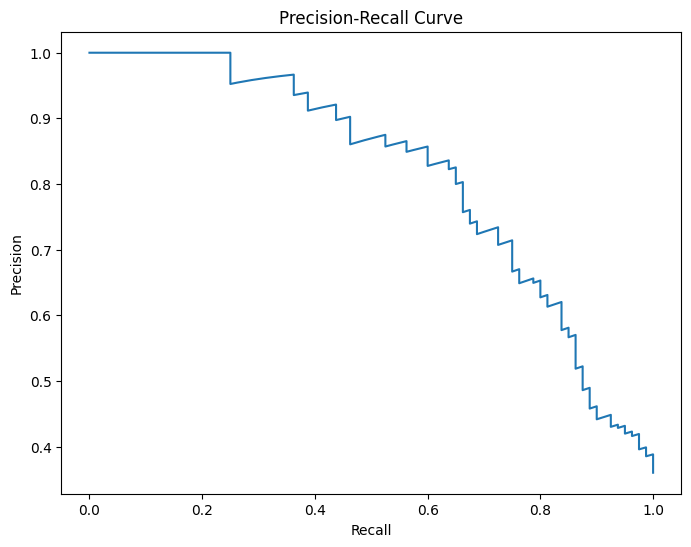

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

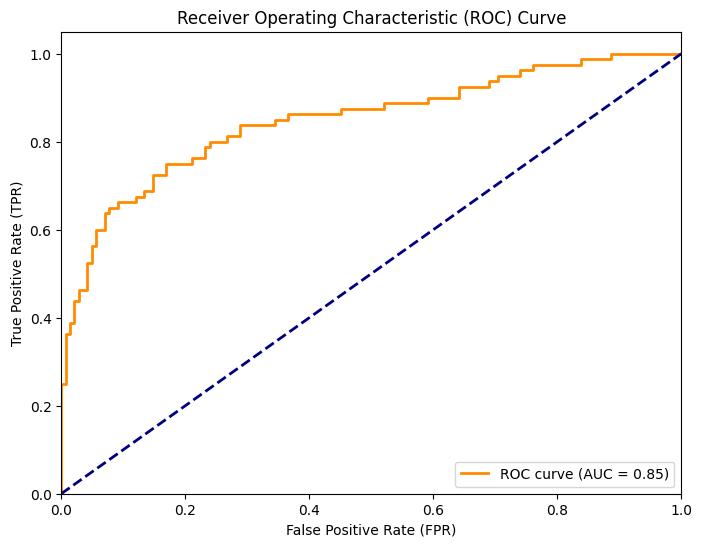

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
roc_auc = roc_auc_score(y_test, lr_probs)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


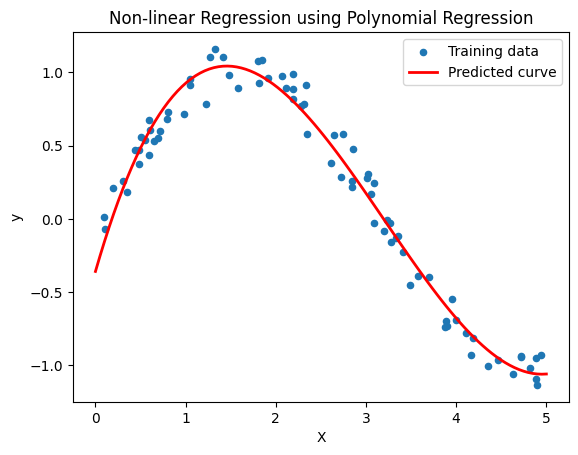

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate some random data for demonstration purposes
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Create polynomial features
degree = 3  # You can adjust the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Predict on new data
X_new = np.linspace(0, 5, 100)[:, np.newaxis]
X_new_poly = poly_features.transform(X_new)
y_new = model.predict(X_new_poly)

# Plot the results
plt.scatter(X, y, s=20, label='Training data')
plt.plot(X_new, y_new, color='red', linewidth=2, label='Predicted curve')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Non-linear Regression using Polynomial Regression')
plt.show()
